# The Sparks Foundation 
# Data Science & Business Analytics
# Task6: Prediction using Decision Tree Algorithm
    Create the Decision Tree classifier and visualize it graphically. 
    The purpose is if we feed any new data to this  classifier, it would be able to predict the right class accordingly. 
    
### Name : Isaiyamudhu M    

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing  
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

# Loading dataset

In [2]:
iris_ds = pd.read_csv('iris.csv')
iris_ds.head() # see the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Count value for each Species labels
iris_ds['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

# Data Preprocessing

In [4]:
#droping Id column 
iris_ds = iris_ds.drop('Id', 1 )

In [5]:
#Data types of dataset
iris_ds.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
#Dimentions of dataset
print(iris_ds.shape)

(150, 5)


In [7]:
#Checking Null values
iris_ds.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Visualisation

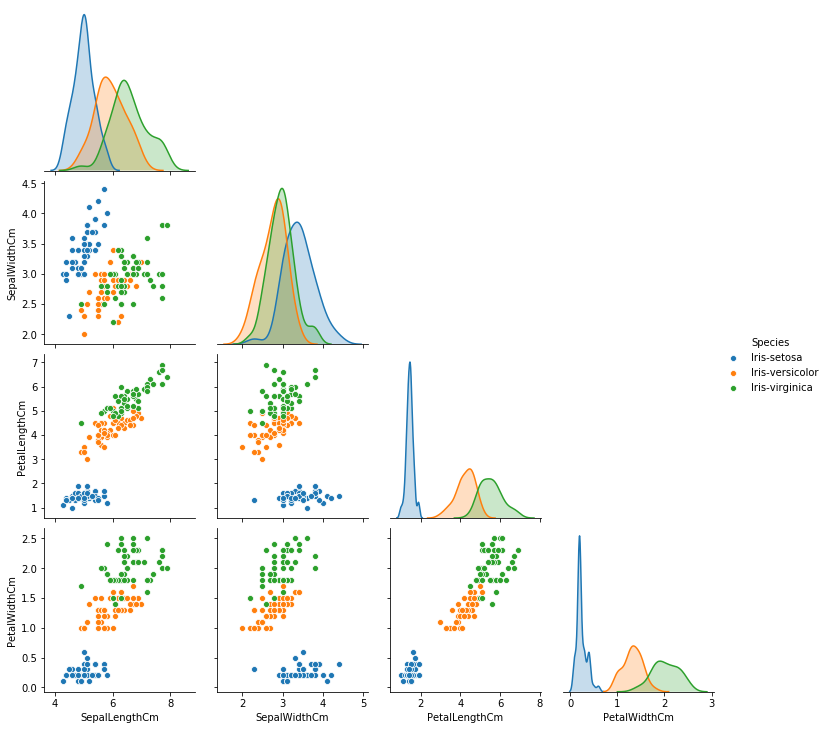

In [8]:
sns.pairplot(iris_ds, hue='Species' ,corner=True)  # to show relation between columns

## From the results of pair plot, We can see that all blue points are well separated with other two classes, But Versicolor and virginica are partially overlapping with each other. 

# Label Encoding

In [9]:
#Label Encoding Species column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris_ds['Species']=le.fit_transform(iris_ds['Species'])

# Splitting Train and Test set

In [10]:
data = iris_ds.values

#here we seperating the input/independent variables and target variables
X, y = data[:,:-1], data[:,-1] 

#splitting in the ratio 70:30 for training and validating purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


# Applying Decision Tree Classifier on Training Data

In [11]:
#  create a Decision tree classifier and fitting training the dataset 
clf = DecisionTreeClassifier()
dtree = clf.fit(X_train,y_train)

# Making Predictions

In [12]:
#Making prediction
pred = dtree.predict(X_test) 

# Checking the performance of model

In [13]:
#Checking the performance of model
accuracy_score = dtree.score(X_test, pred)
print('Accuracy score for validation test data is:',accuracy_score)

Accuracy score for validation test data is: 1.0


#### i.e we got 100% accurate model.

# Visualizing the Decision Tree 

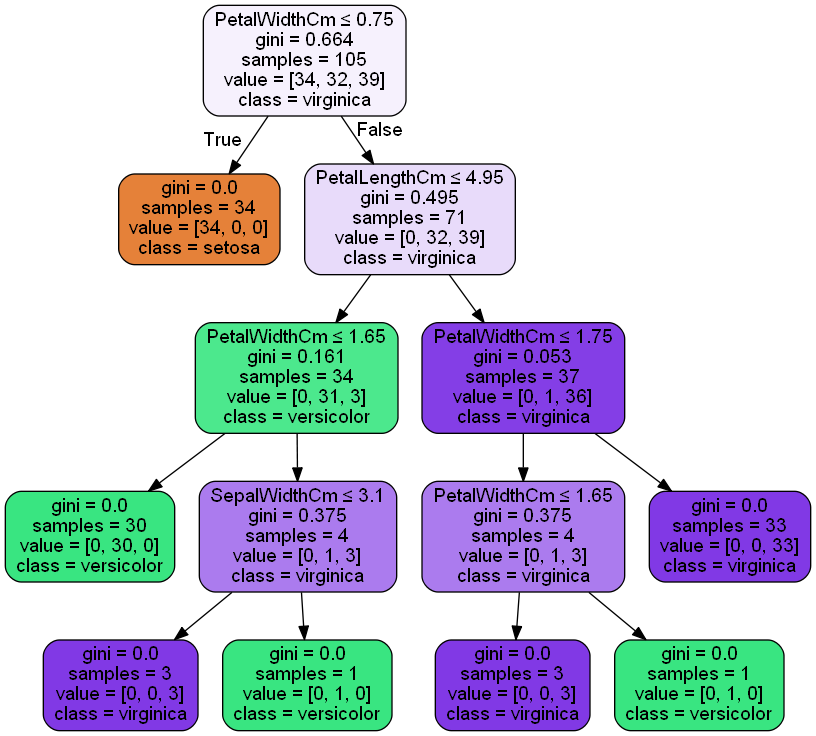

In [15]:
# Import necessary libraries for graphviz

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target_names=['setosa', 'versicolor', 'virginica']

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=feature_names, 
                class_names=target_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Thank you